In [2]:
import pandas as pd

In [3]:
import pandas as pd

# Try reading with ISO-8859-1 encoding
df = pd.read_csv("Mobiles Dataset (2025).csv", encoding='ISO-8859-1')

# Display the first few rows
print(df.head())

  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999             INR 84,999              

In [4]:
# Check column names and missing values
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [5]:
print(df.isnull().sum()) 

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64


In [6]:
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(',', '').str.replace('mAh', '').astype(float)
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(',', '', regex=False).str.replace('mAh', '', regex=False).astype(float)

In [7]:
df['Launched Price (USA)'] = df['Launched Price (USA)'].str.replace('USD', '').str.replace(',', '').astype(float)

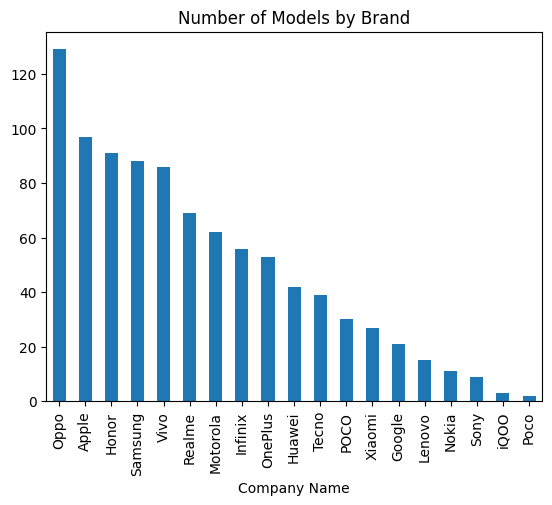

In [8]:
import matplotlib.pyplot as plt

df['Company Name'].value_counts().plot(kind='bar')
plt.title("Number of Models by Brand")
plt.show()

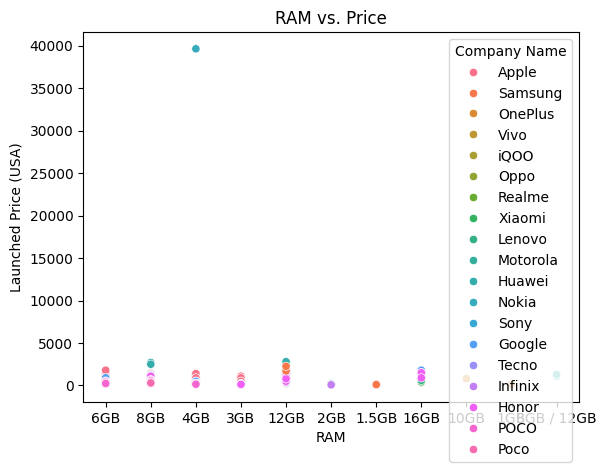

In [9]:
import seaborn as sns

sns.scatterplot(x='RAM', y='Launched Price (USA)', hue='Company Name', data=df)
plt.title("RAM vs. Price")
plt.show()

<Axes: xlabel='Company Name'>

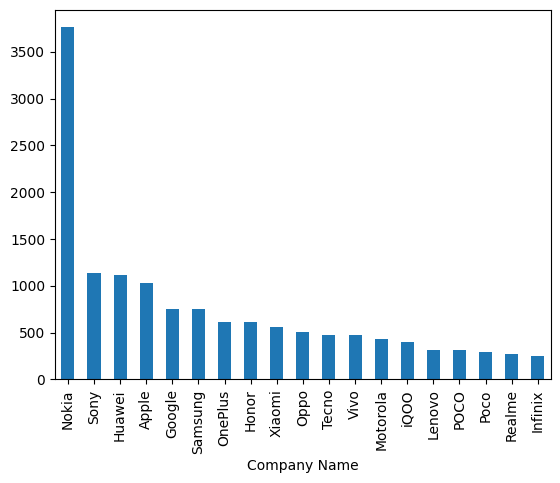

In [10]:
df.groupby('Company Name')['Launched Price (USA)'].mean().sort_values(ascending=False).plot(kind='bar')

In [11]:
pip install streamlit pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


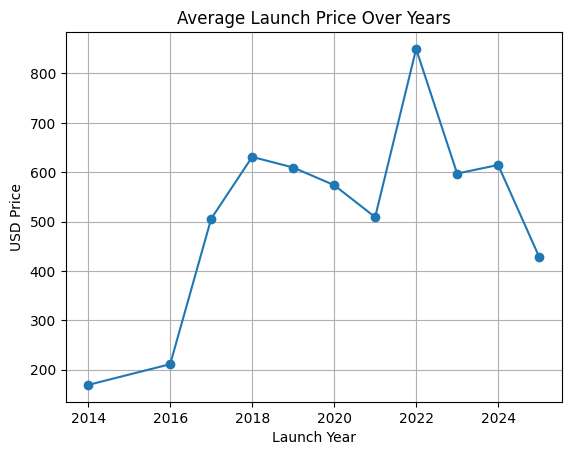

In [12]:
df.groupby('Launched Year')['Launched Price (USA)'].mean().plot(marker='o')
plt.title("Average Launch Price Over Years")
plt.ylabel("USD Price")
plt.xlabel("Launch Year")
plt.grid(True)
plt.show()


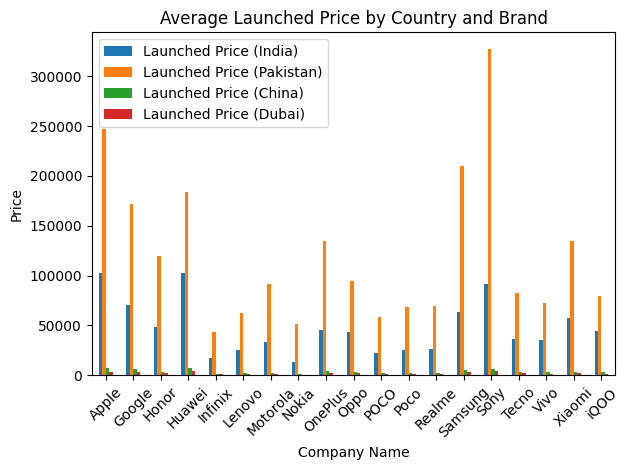

In [13]:
price_cols = ['Launched Price (India)', 'Launched Price (Pakistan)', 'Launched Price (China)', 'Launched Price (Dubai)']
for col in price_cols:
    df[col] = df[col].str.extract(r'(\d[\d,]*)')[0].str.replace(',', '').astype(float)

df[['Company Name'] + price_cols].groupby('Company Name').mean().plot(kind='bar')
plt.title("Average Launched Price by Country and Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


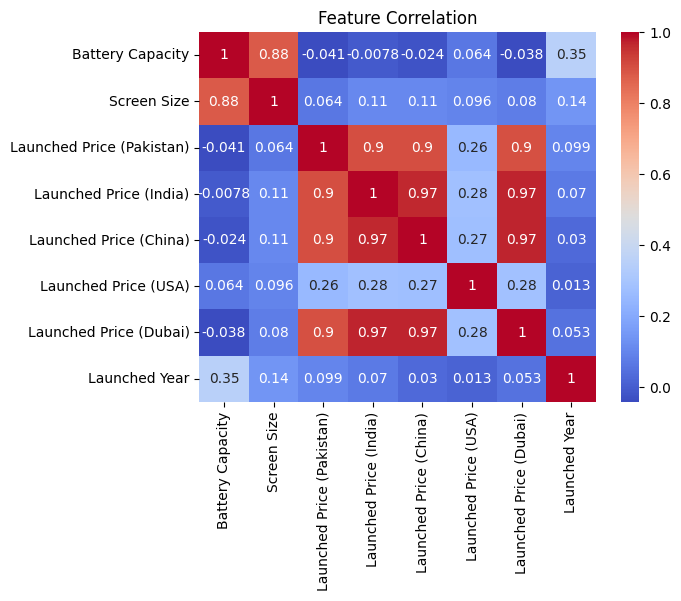

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [15]:
import streamlit as st
import pandas as pd

# Load cleaned data
df = pd.read_csv("Mobiles Dataset (2025).csv", encoding='latin1')  # or encoding='utf-8', depending on what works for you

# Clean the 'Launched Price (USA)' column
df['Launched Price (USA)'] = (
    df['Launched Price (USA)']
    .astype(str)
    .str.replace('USD', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)

# df = pd.read_csv("Mobiles Dataset (2025).csv", encoding='ISO-8859-1')

# Title
st.title("📱 Mobile Phone Explorer")

# Sidebar filters
brand = st.sidebar.selectbox("Brand", df['Company Name'].unique())
min_price = st.sidebar.slider("Min Price (USD)", float(df['Launched Price (USA)'].min()), float(df['Launched Price (USA)'].max()))

# Filter data
filtered_df = df[(df['Company Name'] == brand) & (df['Launched Price (USA)'] >= min_price)]

# Display
st.dataframe(filtered_df)
st.bar_chart(filtered_df['Launched Price (USA)'])

2025-04-22 14:52:42.684 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 14:52:44.104 
  command:

    streamlit run C:\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-22 14:52:44.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 14:52:44.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 14:52:44.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 14:52:44.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 14:52:44.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 14:52:44.114 Session state does not function whe

DeltaGenerator()